## Content

- [Generating Data](#generating-data)
- [Linear Regression with sklearn](#linear-regression-with-sklearn)
- [Linear Regression from scratch](#linear-regression-from-scratch)
    - [Training The Model](#training-the-model)
    - [Model Accuracy](#model-accuracy)
    - [Gradient Descent Results](#gradient-descent-results)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import math

<a name="generating-data"></a>
### Generating Data

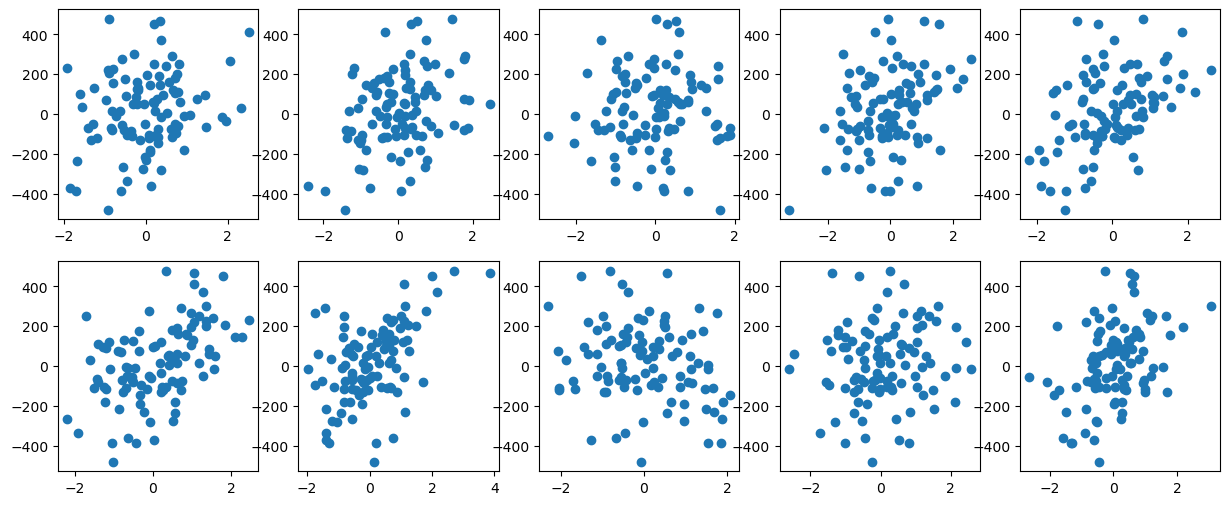

In [2]:
x, y = make_regression(n_samples=100, n_features=10, noise=50, random_state=42)
m, n = x.shape

fig, ax = plt.subplots( math.ceil(n/5), 5, figsize=(15, 6) )
ax = ax.ravel()
for i in range(n):
    ax[i].scatter(x[:,i], y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

<a name="linear-regression-with-sklearn"></a>
### Linear Regression with sklearn

In [4]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train) 

sk_y_pred = sk_model.predict(X_test)

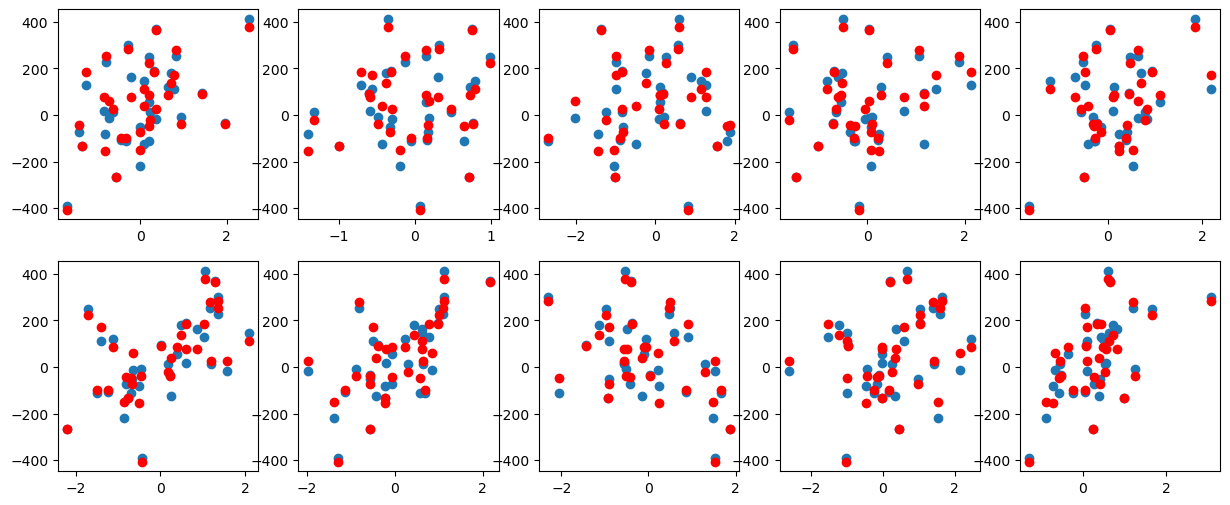

In [5]:
fig, ax = plt.subplots( math.ceil(n//5), 5, figsize=(15, 6) )

ax = ax.ravel()
for i in range(x.shape[1]):
    ax[i].scatter(X_test[:,i], y_test)
    ax[i].scatter(X_test[:,i], sk_y_pred, c='r')

In [6]:
print('Accuracy with test data:', sk_model.score(X_test, y_test))

Accuracy with test data: 0.926966815723728


<a name="linear-regression-from-scratch"></a>
### Linear Regression from skratch

In [35]:
class Linear_Regression:
    
    def __init__(self, x, y, alpha=.01, max_iters=100000):
        self.w = np.zeros(X_train.shape[1])
        self.b = 0
        
        self.actual_iters = 0
        self.w, self.b, self.cost_hist = self.gradient_descent(X_train, y_train, self.w, self.b, alpha, max_iters)
        
    # ---------------------------
    def predict(self, x):
        return x.dot(self.w) + self.b    
    
    def cost(self, x, y, w, b):
        '''
        Compute the cost function using squared error cost function 

        Args:
            x: array with shape (m,n)
            y: array with shape (m,)

            w: array with shape (n,)
            b: scalar

        Returns:
            cost_value: scalar
        '''
        f = x.dot(w) + b
        err = (f - y)**2

        cost_value = sum(err) / (2 * x.shape[0])

        return cost_value

    def gradient_descent(self, x, y, w, b, alpha, max_iters):
        '''
        Computes the gradient for linear regression 

        Args:
            x: array with shape (m,n)
            y: array with shape (m,)

            w: array with shape (n,)
            b: scalar

            alpha: learning rate
            max_iters: The maximum number of iterations

        Returns:
            w: coefficients after updating
            b: intercept after updating 
            cost_hist: history of cost over iterations
        '''
        cost_hist = []
        prev_cost = self.cost(x, y, w, b)

        for i in range(max_iters):

            cost_hist.append( prev_cost )
            
            f = x.dot(w) + b

            dj_dw = (f - y) @ x
            dj_db = sum(f - y)

            w = w - alpha * dj_dw / x.shape[0]
            b = b - alpha * dj_db / x.shape[0]
            
            #------------------------------------------------------#
            #       stop when reaching the stopping criterion.     #  
            
            current_cost = self.cost(x, y, w, b)
            
            if prev_cost - current_cost <= 1e-3:
                break
            else:
                prev_cost = current_cost
        
        self.actual_iters = len(cost_hist)
        return w, b, cost_hist
    
    def score(self, y_pred, y_true):
        '''
        Calsulating the coefficient of determination of the prediction.
        '''
        u = sum( (y_pred - y_true)**2 )
        v = sum( (y_true - y_true.mean())**2 )

        R = 1- (u/v)
        return R

<a name="training-the-model"></a>
### Training The Model

In [36]:
my_model = Linear_Regression(X_train, y_train)
my_y_pred = my_model.predict(X_test)

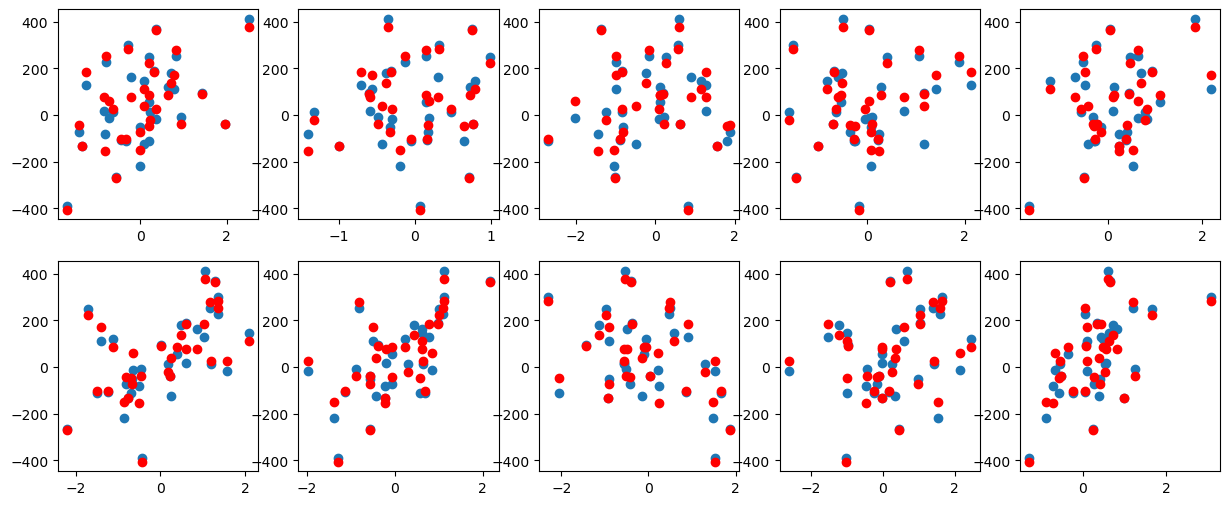

In [37]:
fig, ax = plt.subplots( math.ceil(n//5), 5, figsize=(15, 6) )

ax = ax.ravel()
for i in range(x.shape[1]):
    ax[i].scatter(X_test[:,i], y_test)
    ax[i].scatter(X_test[:,i], my_y_pred, c='r')

<a name="model-accuracy"></a>
### Model Accuracy 

In [38]:
print('Accuracy with test data:', my_model.score(my_y_pred, y_test))

Accuracy with test data: 0.9269463877026756


Text(0, 0.5, 'cost')

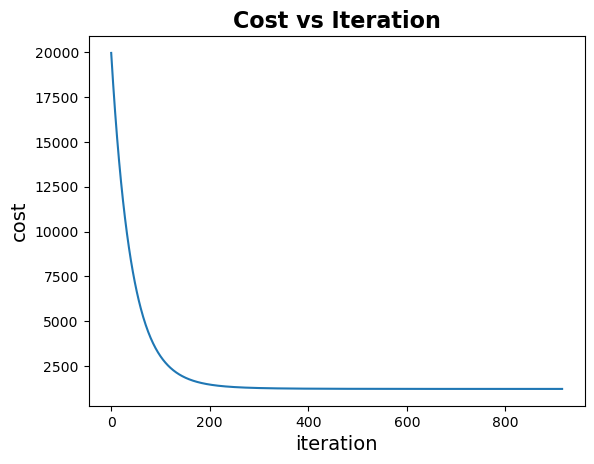

In [39]:
plt.plot(np.arange(my_model.actual_iters), my_model.cost_hist)

plt.title("Cost vs Iteration", fontsize=16, fontweight='bold')
plt.xlabel("iteration", fontsize=14)
plt.ylabel("cost", fontsize=14)


<a name="gradient-descent-results"></a>
###  Gradient Descent Results

In [40]:
print(f"number of iterations completed: {my_model.actual_iters}\n")
print(f"model parameters: w: {my_model.w}, b:{my_model.b}")

number of iterations completed: 916

model parameters: w: [21.59965481 60.28757123 -1.99885119 67.10654809 94.12807137 67.4447399
 75.06397197  2.65986756  6.23863009 67.50265054], b:9.611256469682305


In [41]:
from sklearn.linear_model import SGDRegressor

GD = SGDRegressor(max_iter=1000)
GD.fit(X_train, y_train)

print(f"number of iterations completed: {GD.n_iter_}\n")

b_norm = GD.intercept_
w_norm = GD.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

number of iterations completed: 132

model parameters: w: [21.5465355  60.16080131 -1.91134414 67.06118904 94.30559337 67.20740465
 75.16670178  2.81141801  6.25028656 67.83653077], b:[9.74785548]
